# Chapter-2 Getting Started with ONNX

#### Execute below steps before the start of this notebook.

### Installing Python3.10
* For Windows
```
Download and install python 3.10 from https://www.python.org/downloads/windows.
```

* For Linux
```
sudo apt update
sudo apt install -y software-properties-common
sudo add-apt-repository ppa:deadsnakes/ppa
sudo apt update
sudo apt install -y python3.11
sudo apt install python3.11-venv
curl -sSL https://bootstrap.pypa.io/get-pip.py -o get-pip.py && python get-pip.py
```

### Verify python installation
```
python3 --version
```

### Setup Virtual Environment
```
python -m venv ./onnx_env
```

### Activate environment
* For Windows
```
./onnx_env/Scripts/activate
```

* For Linux
```		
source ./onnx_env/bin/activate
```

### Install Jupyter Notebook
```
pip install jupyter notebook
```

### Start the Jupyter Notebook
```
jupyter notebook
```

### Install required ONNX dependencies

In [1]:
!pip install onnx onnxruntime netron opencv-python-headless

  Using cached onnx-1.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
  Using cached onnxruntime-1.20.1-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (13.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 12.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 KB 12.4 MB/s eta 0:00:00
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)


### Download ResNet18 ONNX model

In [2]:
!wget https://media.githubusercontent.com/media/onnx/models/refs/heads/main/validated/vision/classification/resnet/model/resnet18-v1-7.onnx

--2024-12-30 00:04:10--  https://media.githubusercontent.com/media/onnx/models/refs/heads/main/validated/vision/classification/resnet/model/resnet18-v1-7.onnx
185.199.109.133, 185.199.108.133, 185.199.110.133, ...rcontent.com)... 
connected. to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... 
200 OKequest sent, awaiting response... 
Length: 46820737 (45M) [application/octet-stream]
Saving to: ‘resnet18-v1-7.onnx’

resnet18-v1-7.onnx  100%[===================>]  44.65M  10.9MB/s    in 3.5s    

2024-12-30 00:04:17 (12.8 MB/s) - ‘resnet18-v1-7.onnx’ saved [46820737/46820737]



### Visualize the model in Netron

In [3]:
import IPython
import netron

port = 6006
netron.start("resnet18-v1-7.onnx", port, browse=False)
IPython.display.IFrame(f"http://localhost:{port}", width=1000, height=500)

Serving 'resnet18-v1-7.onnx' at http://localhost:6006


### Load the model in ONNX

In [4]:
import onnx
model = onnx.load("resnet18-v1-7.onnx")

In [5]:
# Onnx models are stored as ModelProto object.
print("Onnx model stored as: ", type(model))

Onnx model stored as:  <class 'onnx.onnx_ml_pb2.ModelProto'>


In [6]:
# Each ONNX model would have a particular Opset version and IR version.
print("Model IR version: ", model.ir_version)
print("Model opset version: ", model.opset_import[0].version)

Model IR version:  3
Model opset version:  8


In [7]:
# Each ModelProto object would contain several GraphProto objects.
graph = model.graph
print("Graph stored as: ", type(graph))

Graph stored as:  <class 'onnx.onnx_ml_pb2.GraphProto'>


In [8]:
# Model Input and Output
print("Total inputs of graph: ", len(graph.input))
print("Total initializers: ", len(graph.initializer))
print("Total outputs of graph: ", len(graph.output))

print("\n\nOutput of graph: ", graph.output[0])

Total inputs of graph:  103
Total initializers:  102
Total outputs of graph:  1


Output of graph:  name: "resnetv15_dense0_fwd"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_param: "N"
      }
      dim {
        dim_value: 1000
      }
    }
  }
}



In [9]:
# Each GraphProto object contains NodeProto objects.
print(f"Total nodes in graph: {len(graph.node)}\n")

first_conv_node = graph.node[0]
print(f"First convolution node: \n\n{first_conv_node}")

Total nodes in graph: 69

First convolution node: 

input: "data"
input: "resnetv15_conv0_weight"
output: "resnetv15_conv0_fwd"
name: "resnetv15_conv0_fwd"
op_type: "Conv"
attribute {
  name: "dilations"
  ints: 1
  ints: 1
  type: INTS
}
attribute {
  name: "group"
  i: 1
  type: INT
}
attribute {
  name: "kernel_shape"
  ints: 7
  ints: 7
  type: INTS
}
attribute {
  name: "pads"
  ints: 3
  ints: 3
  ints: 3
  ints: 3
  type: INTS
}
attribute {
  name: "strides"
  ints: 2
  ints: 2
  type: INTS
}



In [10]:
# Node's attribute which is stored as AttributeProto can be accessed as below.

print("Attribute type: ", type(first_conv_node.attribute[0]))

print(f"Node: {first_conv_node.name}\n")
for attr in first_conv_node.attribute:
    print(f"Attribute name: {attr.name}, value: {onnx.helper.get_attribute_value(attr)}")    

Attribute type:  <class 'onnx.onnx_ml_pb2.AttributeProto'>
Node: resnetv15_conv0_fwd

Attribute name: dilations, value: [1, 1]
Attribute name: group, value: 1
Attribute name: kernel_shape, value: [7, 7]
Attribute name: pads, value: [3, 3, 3, 3]
Attribute name: strides, value: [2, 2]


In [11]:
# Model's weights are stored as constant nodes or initializers.
# Initializers are stored as TensorProto inside GraphProto.
print("Total constants in graph: ", len(graph.initializer))
print("Initializer type: ", type(graph.initializer[0]))
print("\nFirst initializer: \n\n", graph.initializer[0])

Total constants in graph:  102
Initializer type:  <class 'onnx.onnx_ml_pb2.TensorProto'>

First initializer: 

 dims: 64
dims: 3
dims: 7
dims: 7
data_type: 1
float_data: -0.00181841
float_data: -0.0202943962
float_data: -0.0564728752
float_data: -0.0171231851
float_data: 0.0275569279
float_data: 0.0169422235
float_data: -0.0261198264
float_data: -0.0191061497
float_data: -0.0150184799
float_data: -0.013928757
float_data: 0.0427101217
float_data: 0.0468977951
float_data: 0.013606674
float_data: -0.0265738834
float_data: -0.0226846598
float_data: -0.00833997782
float_data: 0.0150225367
float_data: 0.0355799757
float_data: 0.0497992784
float_data: 0.0260790698
float_data: -0.0142802447
float_data: 0.00766192703
float_data: 0.0261595882
float_data: 0.0359908901
float_data: 0.0214251149
float_data: 0.0469522774
float_data: 0.0528742597
float_data: 0.00616462203
float_data: 0.00768385781
float_data: 0.0375749506
float_data: 0.0459949709
float_data: 0.0354223102
float_data: 0.061670538
float_

In [12]:
# Actual tensor value from initializer can be obtained as below.

first_init = graph.initializer[0]
first_init_value = onnx.numpy_helper.to_array(first_init)
print("First initializer")
print("name: ", first_init.name)
print("shape: ", first_init_value.shape) 
print("dtype: ", first_init_value.dtype)
print("value: ", first_init_value)

First initializer
name:  resnetv15_conv0_weight
shape:  (64, 3, 7, 7)
dtype:  float32
value:  [[[[-1.81841000e-03 -2.02943962e-02 -5.64728752e-02 ...  2.75569279e-02
     1.69422235e-02 -2.61198264e-02]
   [-1.91061497e-02 -1.50184799e-02 -1.39287570e-02 ...  4.68977951e-02
     1.36066740e-02 -2.65738834e-02]
   [-2.26846598e-02 -8.33997782e-03  1.50225367e-02 ...  4.97992784e-02
     2.60790698e-02 -1.42802447e-02]
   ...
   [ 7.68385781e-03  3.75749506e-02  4.59949709e-02 ...  6.16705380e-02
     5.27052656e-02 -5.58289466e-03]
   [ 1.11488421e-02  3.37563045e-02  4.41418886e-02 ...  5.52862063e-02
     8.68887547e-03 -4.06390540e-02]
   [-3.80610190e-02  4.65004565e-03  5.96935414e-02 ...  7.75443390e-02
     9.65741347e-04 -7.41245821e-02]]

  [[-1.38826156e-02 -1.94230378e-02 -4.44739461e-02 ...  1.17361974e-02
    -1.40118133e-02 -5.14912903e-02]
   [-1.14789093e-02  1.54668484e-02  1.67245734e-02 ...  4.28373478e-02
     1.45986686e-02 -1.94197986e-02]
   [-4.76597250e-03  2.12

In [13]:
# Each node's input and output tensors have shape and data type information. This info is stored as ValueInfoProto structure of GraphProto.

all_value_infos = model.graph.value_info
print("Total number of value info : ", len(all_value_infos))

# There are no value info available in graph because intermediate nodes doesn't have any shape information. This information can be obtained by performing shape inference.
model = onnx.shape_inference.infer_shapes(model)

all_value_infos = model.graph.value_info
print("Total number of value info : ", len(all_value_infos))

first_tensor_val_info = all_value_infos[0]
print("Value Info type: ", type(first_tensor_val_info))
print("\nFirst tensor's value info: ", first_tensor_val_info)

Total number of value info :  0
Total number of value info :  68
Value Info type:  <class 'onnx.onnx_ml_pb2.ValueInfoProto'>

First tensor's value info:  name: "resnetv15_conv0_fwd"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_param: "N"
      }
      dim {
        dim_value: 64
      }
      dim {
        dim_value: 112
      }
      dim {
        dim_value: 112
      }
    }
  }
}



### Run the model in Onnxruntime

--2024-12-30 00:04:19--  https://upload.wikimedia.org/wikipedia/commons/9/9b/Photo_of_a_kitten.jpg
103.102.166.240, 2001:df2:e500:ed1a::2:bikimedia.org)... 
connected. to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 2055866 (2.0M) [image/jpeg]
Saving to: ‘Photo_of_a_kitten.jpg’

Photo_of_a_kitten.j 100%[===================>]   1.96M  5.86MB/s    in 0.3s    

2024-12-30 00:04:20 (5.86 MB/s) - ‘Photo_of_a_kitten.jpg’ saved [2055866/2055866]



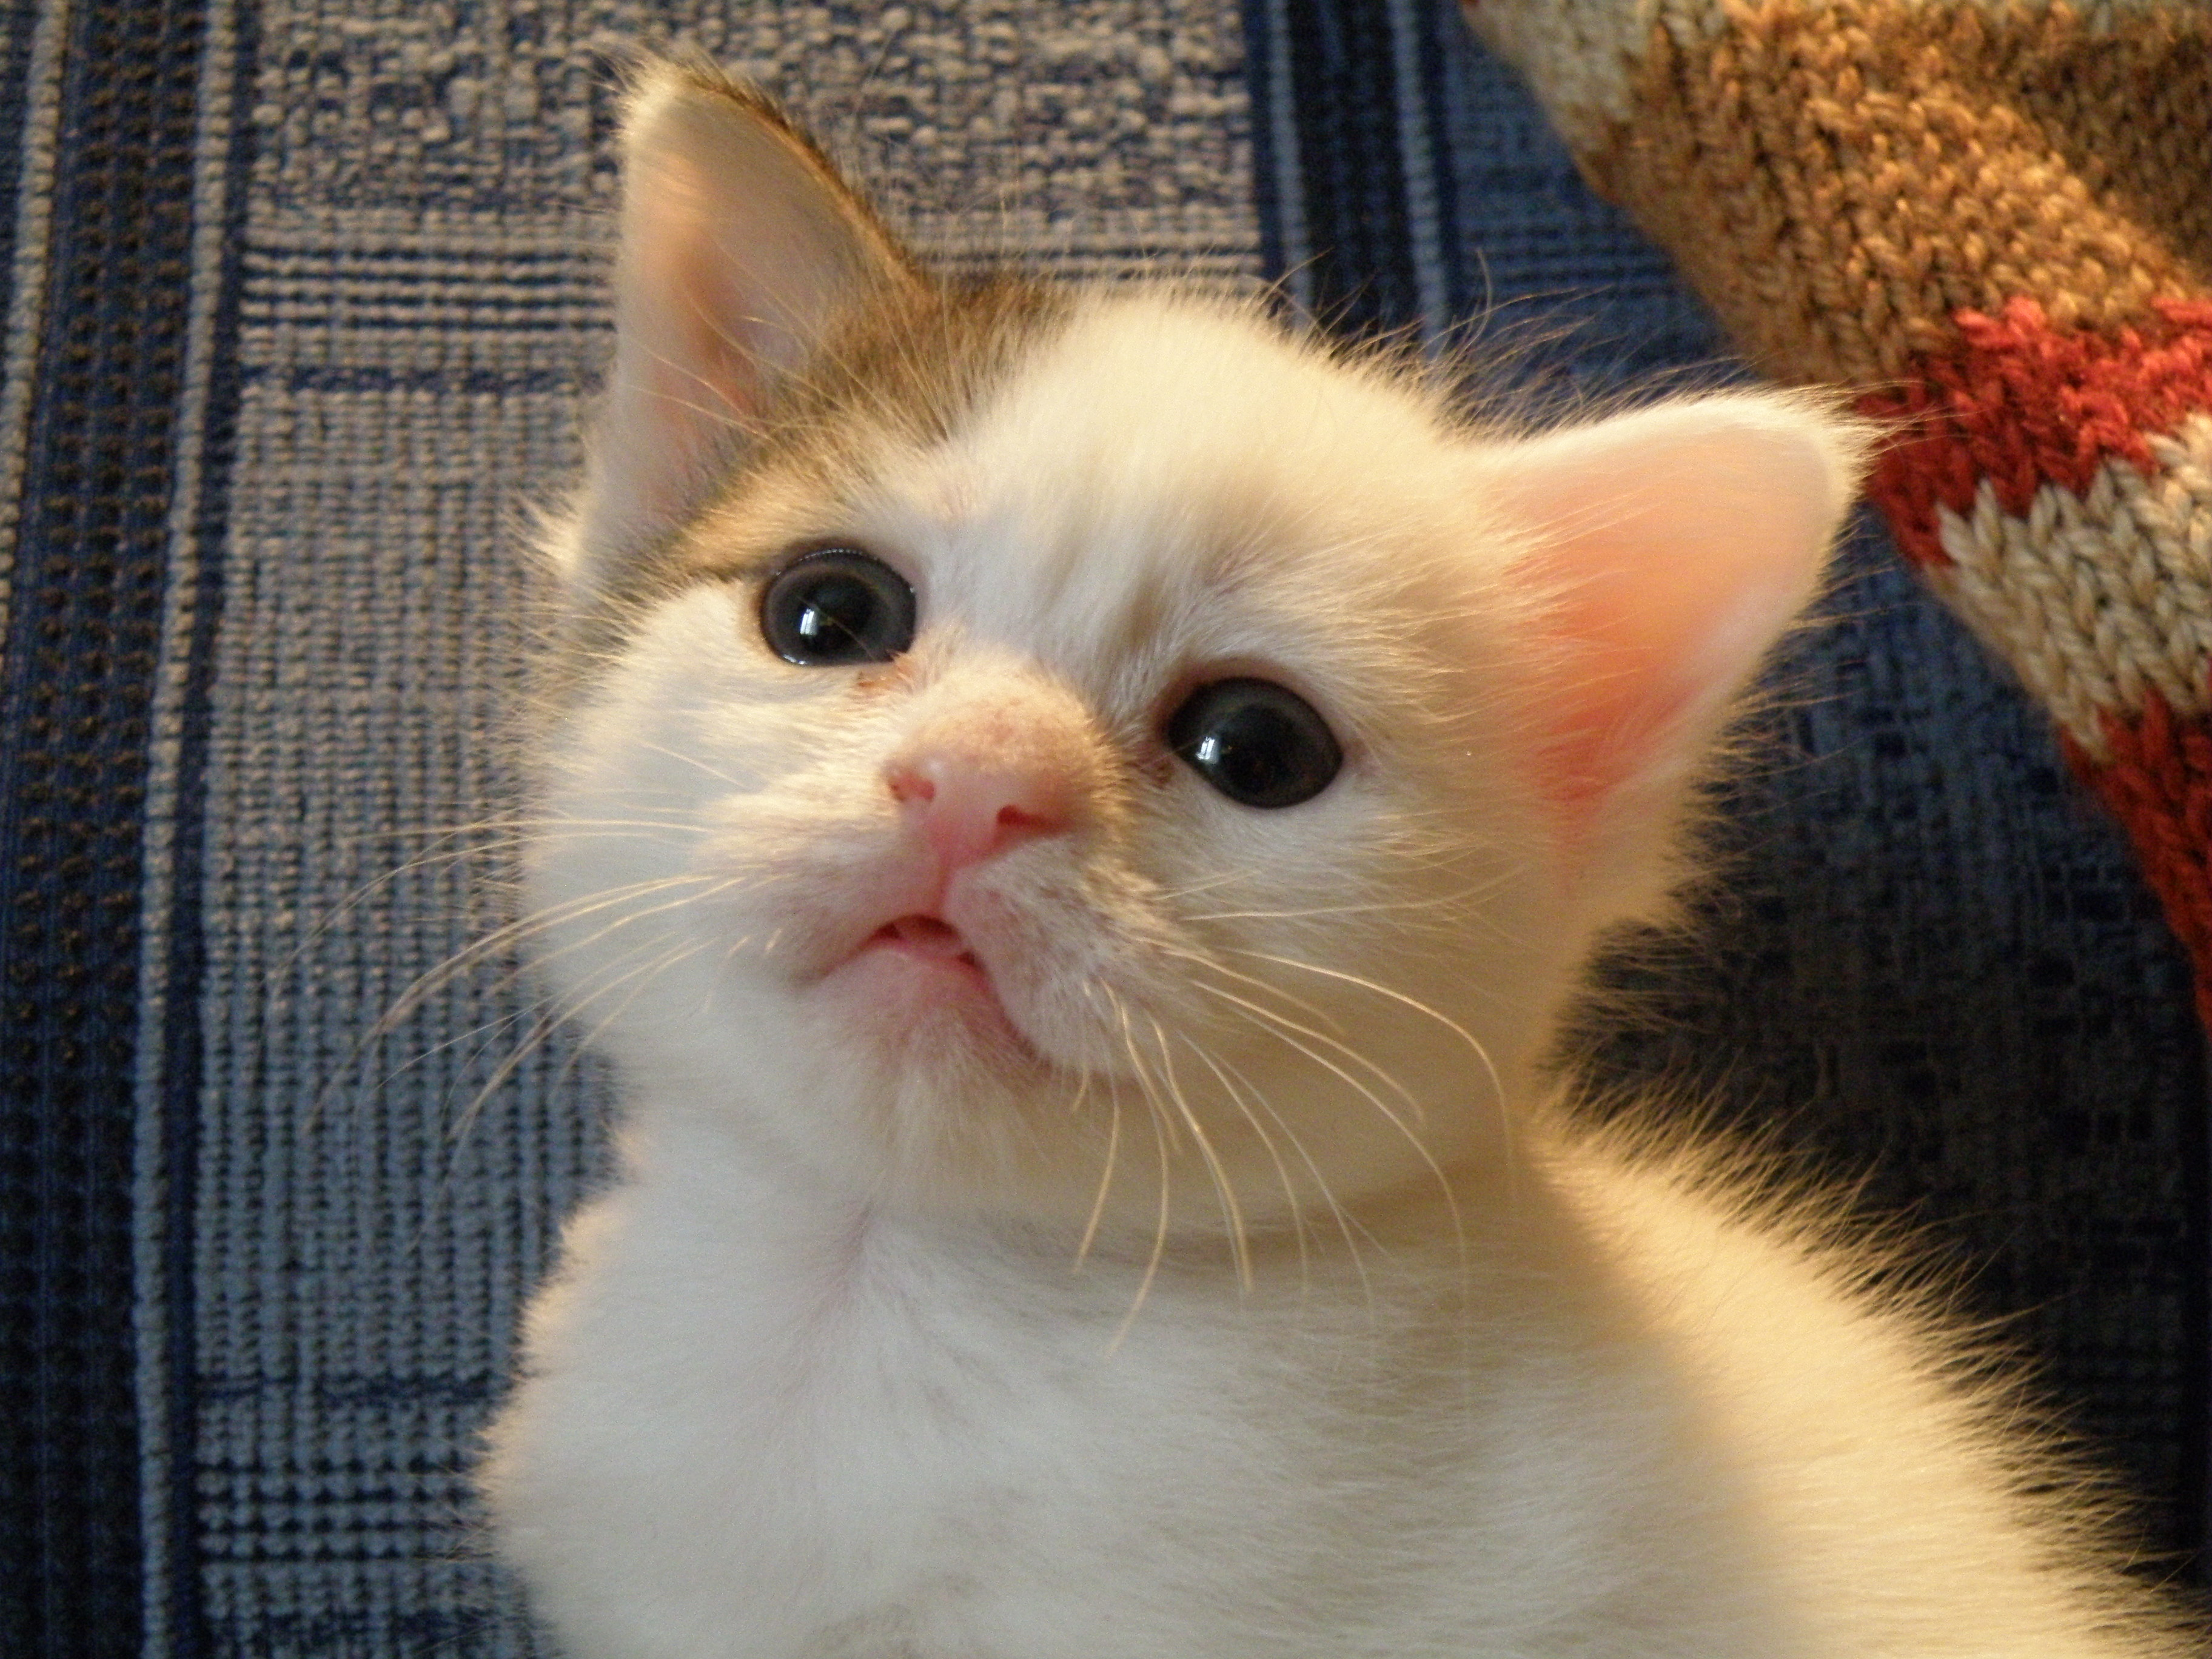

In [14]:
# Download a sample cat image
!wget https://upload.wikimedia.org/wikipedia/commons/9/9b/Photo_of_a_kitten.jpg

# Display the image
from IPython.display import Image
Image("Photo_of_a_kitten.jpg")

In [15]:
# Download imagenet class mapping file
!wget https://gist.githubusercontent.com/marodev/7b3ac5f63b0fc5ace84fa723e72e956d/raw/2c48d37df5c93a2370cecb7415744b01a6154c47/imagenet.json

import json

with open('imagenet.json', 'r') as file:
    class_mapping = json.load(file)

--2024-12-30 00:04:20--  https://gist.githubusercontent.com/marodev/7b3ac5f63b0fc5ace84fa723e72e956d/raw/2c48d37df5c93a2370cecb7415744b01a6154c47/imagenet.json
185.199.110.133, 185.199.111.133, 185.199.108.133, ...ontent.com)... 
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
200 OKequest sent, awaiting response... 
Length: 24365 (24K) [text/plain]
Saving to: ‘imagenet.json’

imagenet.json       100%[===================>]  23.79K  --.-KB/s    in 0.003s  

2024-12-30 00:04:21 (7.95 MB/s) - ‘imagenet.json’ saved [24365/24365]



In [16]:
# Load and preprocess the image as per https://github.com/onnx/models/tree/main/validated/vision/classification/resnet

import cv2
import numpy as np

def preprocess_image(image_path):
    # Step 1: Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Step 2: Resize the image to 224x224 (ResNet18 input size)
    image = cv2.resize(image, (224, 224))

    # Step 3: Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 4: Normalize the image using the mean and std of ImageNet
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    
    # ImageNet Mean and Std
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Normalize based on ImageNet statistics
    image = (image - mean) / std

    # Step 5: Convert the image to a numpy array with shape (224, 224, 3)
    # Step 6: Add an extra batch dimension (1, 224, 224, 3)
    image = np.expand_dims(image, axis=0)

    # Step 7: Convert NHWC layout image into NCHW layout
    image = np.transpose(image, (0, 3, 1, 2))
    
    # Convert image to float32 for model compatibility
    image = image.astype(np.float32)

    return image

# Example usage:
image_path = 'Photo_of_a_kitten.jpg'
preprocessed_image = preprocess_image(image_path)

print("Input shape: ", preprocessed_image.shape)  # Should be (1, 224, 224, 3)

Input shape:  (1, 3, 224, 224)


In [17]:
# Run model in onnxruntime

import onnxruntime as ort

# By default, onnxruntime executes model on CPU. So if we dont provide CPU execution provider then it will run on CPU by default.
execution_provider_list = ['CPUExecutionProvider']

# uncomment below line to execute model on Nvidia GPU. Make sure to install onnxruntime-gpu using "pip install onnxruntime-gpu"
# execution_provider_list = ['CUDAExecutionProvider']

session = ort.InferenceSession("resnet18-v1-7.onnx", providers=execution_provider_list)
input_data = {"data" : preprocessed_image}
model_output = session.run(None, input_data)

print("Total outputs: ", len(model_output))
print("Output shape: ", model_output[0].shape)

Total outputs:  1
Output shape:  (1, 1000)


In [18]:
# Model will generate logits for 1000 classes of imagenet. We will need to apply softmax 

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

probabilities = softmax(model_output[0])
# [1, 1000]

top_5_indices = np.argsort(-probabilities[0])[:5]

for i, idx in enumerate(top_5_indices):
    class_name = class_mapping[f'{idx}']
    class_prob = probabilities[0, idx]*100
    print(f"Top-{i+1} predicted class: {class_name}, probability: {class_prob:.2f} %") 

Top-1 predicted class: Persian_cat, probability: 59.64 %
Top-2 predicted class: window_screen, probability: 13.59 %
Top-3 predicted class: tabby, probability: 3.34 %
Top-4 predicted class: bow_tie, probability: 2.89 %
Top-5 predicted class: hamster, probability: 2.79 %


#### As we can see that the model is predicting the given image as "Persian cat" with 59% probability, which is true as it is a breed of cat.